Objective: The goal of this assignment is to apply Natural Language Processing (NLP), Named Entity Recognition (NER), and Part-of-Speech (POS) techniques in NLP to analyze the Climate Fever dataset. The dataset contains climate change-related articles, and your task is to extract named entities and assign POS tags to different parts of speech in the text.

Instructions: Prior to beginning work on this assignment, review the week's lab session.

Dataset: "Climate Fever" Dataset

Download the Climate Fever dataset from Kaggle using the following link: Climate Fever DatasetLinks to an external site..

Install the necessary libraries for NLP in Python, such as NLTK, Spacy, or any other library of your choice.
Load the dataset into your Python environment and preprocess the data as needed (e.g., remove unnecessary characters, tokenize, etc.).
Apply NER techniques to identify named entities (such as persons, organizations, locations, etc.) within the text.
Implement POS tagging to assign appropriate parts of speech to different words in the text. Analyze the results and provide insights on the named entities and their corresponding parts of speech in the Climate Fever dataset.
Visualize the findings using appropriate graphs, charts, or tables to enhance understanding.
Write a report summarizing your approach, the findings, and any challenges faced during the process.
Note: You are free to use any additional techniques or libraries to enhance the NER and POS tagging tasks. Make sure to provide proper documentation and references for any external resources used.


Submission:

Submit your assignment with (clean) outputs in the form of HTML or PDF containing the implementation of NER and POS tagging.
Include a report summarizing your approach, findings, and challenges faced.

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy

# Download spaCy model for NER (choose an appropriate model)
!python -m spacy download en_core_web_sm

# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")


2023-09-19 01:11:48.067020: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
print(df.columns)


Index(['claim_id', 'claim', 'claim_label', 'evidences/0/evidence_id',
       'evidences/0/evidence_label', 'evidences/0/article',
       'evidences/0/evidence', 'evidences/0/entropy', 'evidences/0/votes/0',
       'evidences/0/votes/1', 'evidences/0/votes/2', 'evidences/0/votes/3',
       'evidences/0/votes/4', 'evidences/1/evidence_id',
       'evidences/1/evidence_label', 'evidences/1/article',
       'evidences/1/evidence', 'evidences/1/entropy', 'evidences/1/votes/0',
       'evidences/1/votes/1', 'evidences/1/votes/2', 'evidences/1/votes/3',
       'evidences/1/votes/4', 'evidences/2/evidence_id',
       'evidences/2/evidence_label', 'evidences/2/article',
       'evidences/2/evidence', 'evidences/2/entropy', 'evidences/2/votes/0',
       'evidences/2/votes/1', 'evidences/2/votes/2', 'evidences/2/votes/3',
       'evidences/2/votes/4', 'evidences/3/evidence_id',
       'evidences/3/evidence_label', 'evidences/3/article',
       'evidences/3/evidence', 'evidences/3/entropy', 'evide

In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy

# Download spaCy model for NER (choose an appropriate model)
!python -m spacy download en_core_web_sm

# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Load your dataset
df = pd.read_csv("climate-fever.csv")


2023-09-19 01:32:34.605426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
# Define a function to extract text from relevant columns
def extract_text(row):
    # Replace 'claim' and 'evidences/0/article' with actual column names
    return row['claim'] + ' ' + row['evidences/0/article']

# Create a new column 'combined_text' with the extracted text
df['combined_text'] = df.apply(extract_text, axis=1)

# Preprocess the combined text (remove HTML tags, special characters, lowercase, etc.)
def preprocess_text(text):
    # Add your preprocessing steps here
    return text

df['preprocessed_text'] = df['combined_text'].apply(preprocess_text)


In [7]:
# Define a function for NER
def perform_ner(text):
    doc = nlp(text)
    # Extract named entities and their types
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

df['ner_results'] = df['preprocessed_text'].apply(perform_ner)


In [10]:
# Download the 'averaged_perceptron_tagger' model
import nltk
nltk.download('averaged_perceptron_tagger')

# Define a function for POS tagging using NLTK
def perform_pos_tagging(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

df['pos_tags'] = df['preprocessed_text'].apply(perform_pos_tagging)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [11]:
# Define a function for POS tagging using spaCy
def perform_pos_tagging_spacy(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

df['pos_tags'] = df['preprocessed_text'].apply(perform_pos_tagging_spacy)


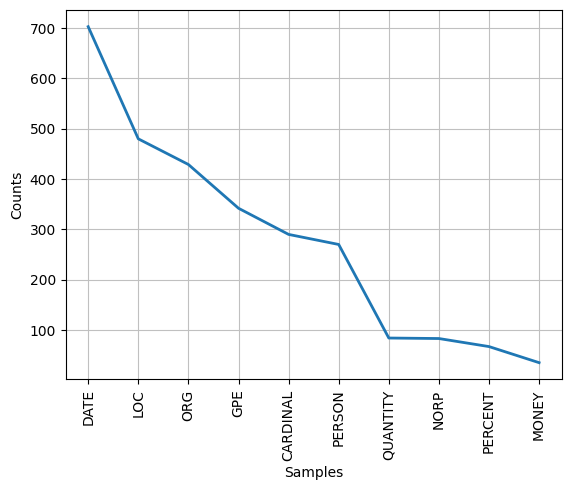

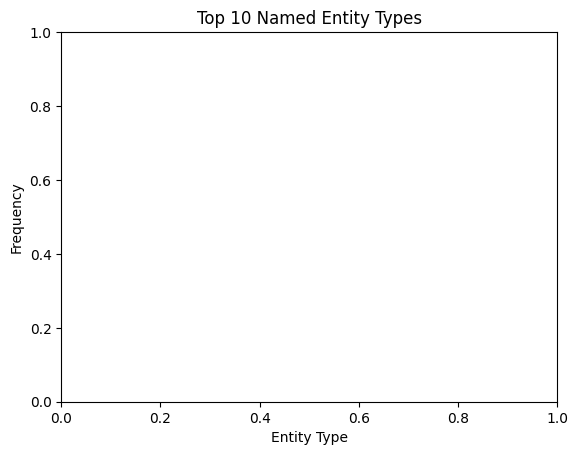

In [12]:
import matplotlib.pyplot as plt

# Assuming you have already performed NER and have the results in df['ner_results']
# Extract entity types
entity_types = [entity[1] for entities in df['ner_results'] for entity in entities]

# Create a frequency distribution of entity types
entity_type_freq = nltk.FreqDist(entity_types)

# Plot a bar chart
entity_type_freq.plot(10, cumulative=False)
plt.title("Top 10 Named Entity Types")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.show()


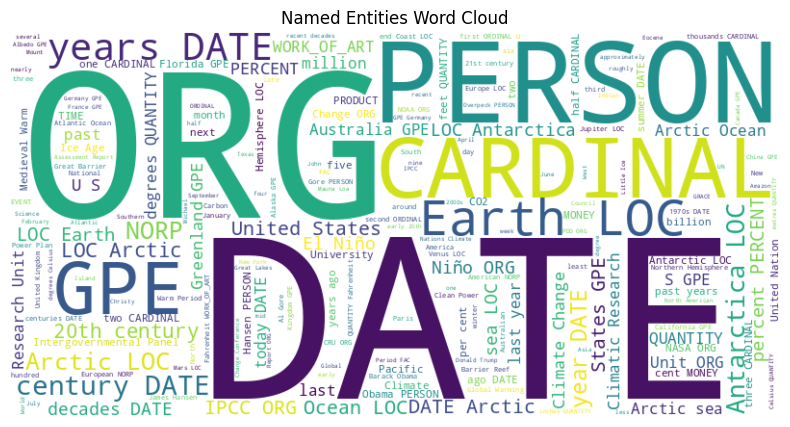

In [13]:
from wordcloud import WordCloud

# Extract named entities as a single text string
named_entities_text = ' '.join([' '.join(entity) for entities in df['ner_results'] for entity in entities])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(named_entities_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Named Entities Word Cloud")
plt.axis("off")
plt.show()


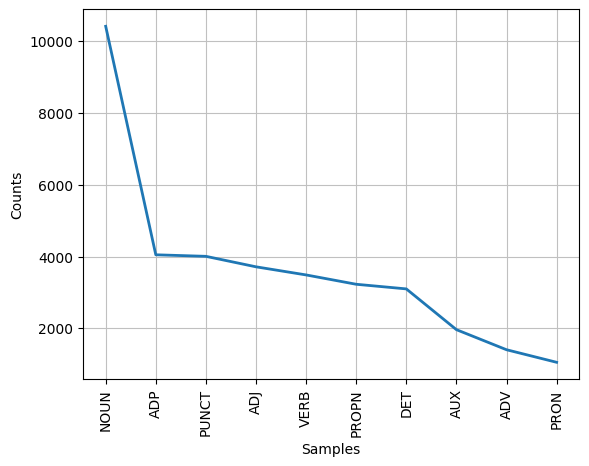

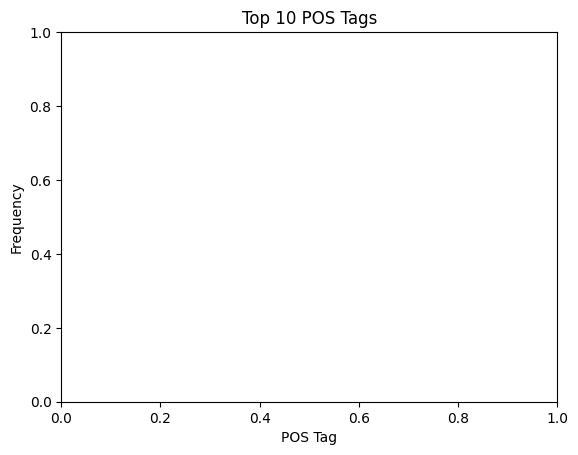

In [14]:
# Assuming you have already performed POS tagging and have the results in df['pos_tags']
# Extract POS tags
pos_tags = [pos[1] for pos_tags in df['pos_tags'] for pos in pos_tags]

# Create a frequency distribution of POS tags
pos_tag_freq = nltk.FreqDist(pos_tags)

# Plot a bar chart
pos_tag_freq.plot(10, cumulative=False)
plt.title("Top 10 POS Tags")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.show()


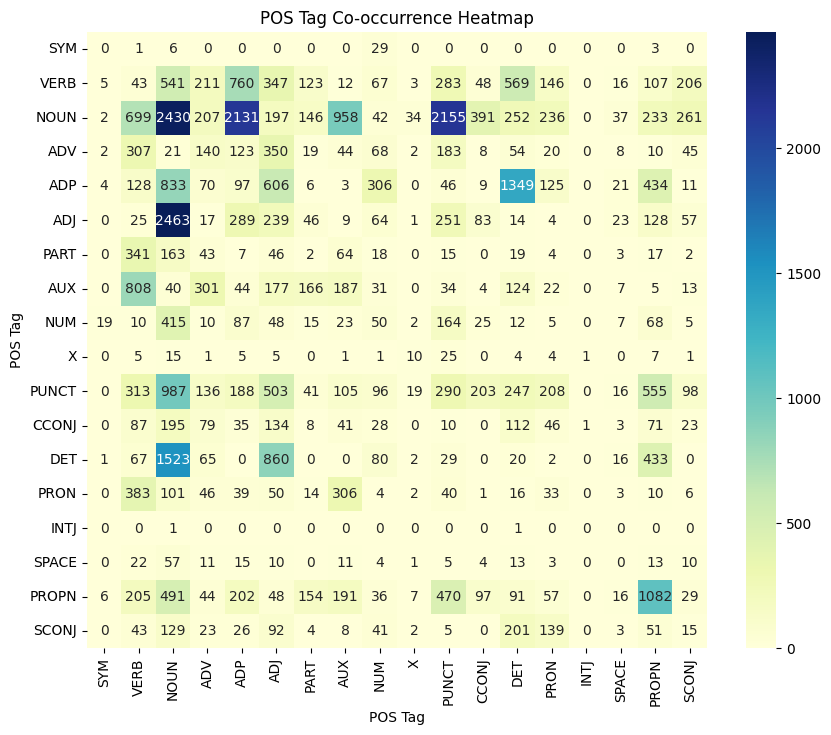

In [18]:
import seaborn as sns
import numpy as np
from collections import Counter

# Assuming you have already performed POS tagging and have the results in df['pos_tags']
# Extract POS tags
pos_tags = [pos[1] for pos_tags in df['pos_tags'] for pos in pos_tags]

# Create a list of POS tag pairs
pos_tag_pairs = list(zip(pos_tags, pos_tags[1:]))

# Calculate the frequency of POS tag pairs
pos_tag_pairs_freq = Counter(pos_tag_pairs)

# Create a set of unique POS tags
unique_pos_tags = list(set(pos_tags))

# Create a matrix of POS tag co-occurrences using a NumPy array
pos_tag_matrix = np.zeros((len(unique_pos_tags), len(unique_pos_tags)), dtype=int)

# Create a mapping of POS tags to matrix indices
tag_to_index = {tag: index for index, tag in enumerate(unique_pos_tags)}

# Fill the matrix with co-occurrence counts
for tag1, tag2 in pos_tag_pairs:
    pos_tag_matrix[tag_to_index[tag1]][tag_to_index[tag2]] += 1

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pos_tag_matrix, cmap='YlGnBu', annot=True, fmt='d', xticklabels=unique_pos_tags, yticklabels=unique_pos_tags)
plt.title("POS Tag Co-occurrence Heatmap")
plt.xlabel("POS Tag")
plt.ylabel("POS Tag")
plt.show()



In [19]:
!pip install pandas nltk spacy wordcloud matplotlib seaborn
!python -m spacy download en_core_web_sm
!pip install -U scikit-learn


2023-09-19 02:22:48.567062: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


2023-09-19 02:24:15.504526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


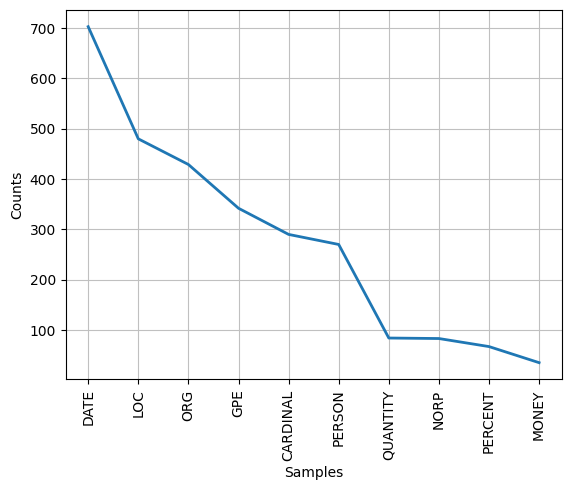

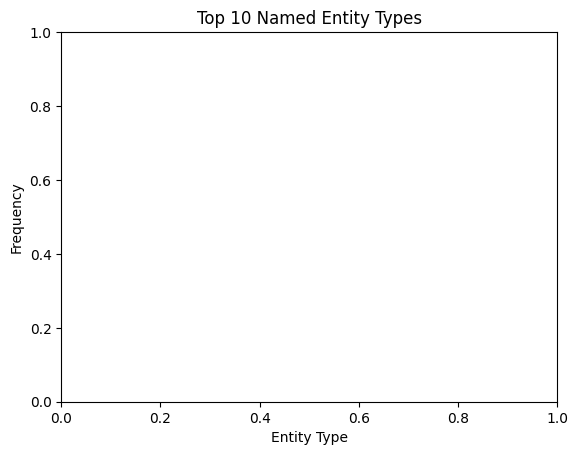

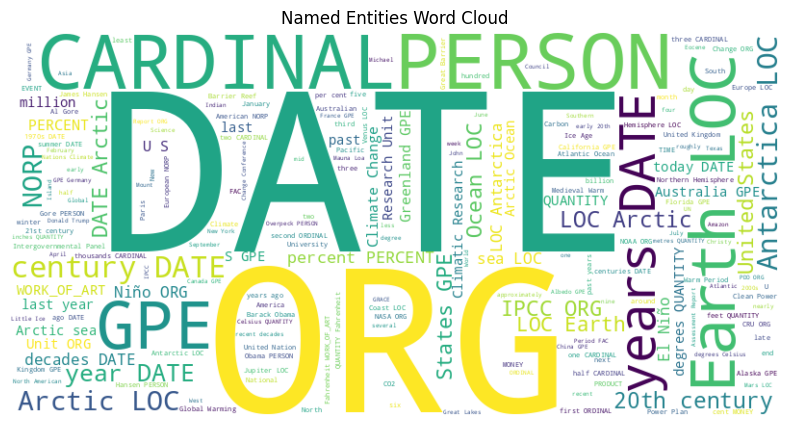

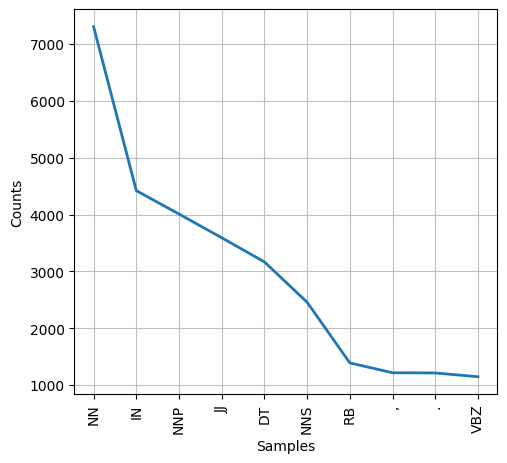

<ipython-input-21-af8d8935884c>:107: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


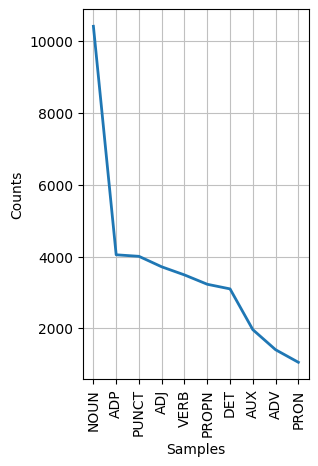

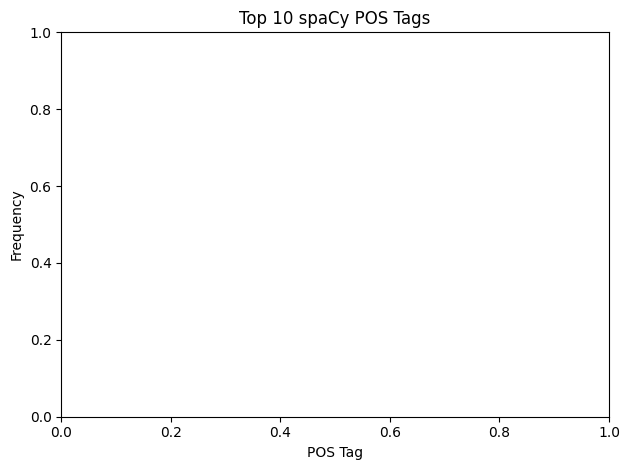

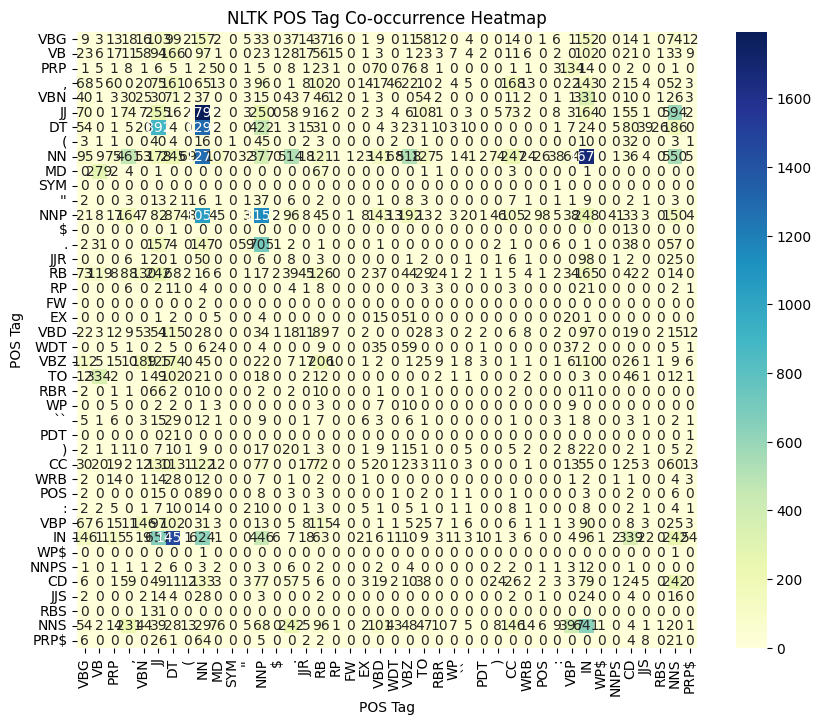

In [21]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from wordcloud import WordCloud

# Download spaCy model for NER
!python -m spacy download en_core_web_sm

# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Load your dataset
df = pd.read_csv("climate-fever.csv")

# Define a function to extract text from relevant columns
def extract_text(row):
    # Replace 'claim' and 'evidences/0/article' with actual column names
    return row['claim'] + ' ' + row['evidences/0/article']

# Create a new column 'combined_text' with the extracted text
df['combined_text'] = df.apply(extract_text, axis=1)

# Preprocess the combined text (remove HTML tags, special characters, lowercase, etc.)
def preprocess_text(text):
    # Add your preprocessing steps here
    return text

df['preprocessed_text'] = df['combined_text'].apply(preprocess_text)

# Define a function for NER
def perform_ner(text):
    doc = nlp(text)
    # Extract named entities and their types
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

df['ner_results'] = df['preprocessed_text'].apply(perform_ner)

# Download the 'averaged_perceptron_tagger' model
nltk.download('averaged_perceptron_tagger')

# Define a function for POS tagging using NLTK
def perform_pos_tagging(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

df['pos_tags_nltk'] = df['preprocessed_text'].apply(perform_pos_tagging)

# Define a function for POS tagging using spaCy
def perform_pos_tagging_spacy(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

df['pos_tags_spacy'] = df['preprocessed_text'].apply(perform_pos_tagging_spacy)

# Assuming you have already performed NER and have the results in df['ner_results']
# Extract entity types
entity_types = [entity[1] for entities in df['ner_results'] for entity in entities]

# Create a frequency distribution of entity types
entity_type_freq = nltk.FreqDist(entity_types)

# Plot a bar chart
entity_type_freq.plot(10, cumulative=False)
plt.title("Top 10 Named Entity Types")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.show()

# Extract named entities as a single text string
named_entities_text = ' '.join([' '.join(entity) for entities in df['ner_results'] for entity in entities])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(named_entities_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Named Entities Word Cloud")
plt.axis("off")
plt.show()

# Assuming you have already performed POS tagging using NLTK and spaCy
# Extract POS tags
pos_tags_nltk = [pos[1] for pos_tags in df['pos_tags_nltk'] for pos in pos_tags]
pos_tags_spacy = [pos[1] for pos_tags in df['pos_tags_spacy'] for pos in pos_tags]

# Create a frequency distribution of POS tags for NLTK and spaCy
pos_tag_freq_nltk = nltk.FreqDist(pos_tags_nltk)
pos_tag_freq_spacy = nltk.FreqDist(pos_tags_spacy)

# Plot bar charts for NLTK and spaCy POS tags
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
pos_tag_freq_nltk.plot(10, cumulative=False)
plt.title("Top 10 NLTK POS Tags")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
pos_tag_freq_spacy.plot(10, cumulative=False)
plt.title("Top 10 spaCy POS Tags")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Create a list of POS tag pairs
pos_tag_pairs = list(zip(pos_tags_nltk, pos_tags_nltk[1:]))

# Calculate the frequency of POS tag pairs
pos_tag_pairs_freq = Counter(pos_tag_pairs)

# Create a set of unique POS tags
unique_pos_tags = list(set(pos_tags_nltk))

# Create a matrix of POS tag co-occurrences using a NumPy array
pos_tag_matrix = np.zeros((len(unique_pos_tags), len(unique_pos_tags)), dtype=int)

# Create a mapping of POS tags to matrix indices
tag_to_index = {tag: index for index, tag in enumerate(unique_pos_tags)}

# Fill the matrix with co-occurrence counts
for tag1, tag2 in pos_tag_pairs:
    pos_tag_matrix[tag_to_index[tag1]][tag_to_index[tag2]] += 1

# Create a heatmap for NLTK POS tags
plt.figure(figsize=(10, 8))
sns.heatmap(pos_tag_matrix, cmap='YlGnBu', annot=True, fmt='d', xticklabels=unique_pos_tags, yticklabels=unique_pos_tags)
plt.title("NLTK POS Tag Co-occurrence Heatmap")
plt.xlabel("POS Tag")
plt.ylabel("POS Tag")
plt.show()


2023-09-19 02:35:02.786438: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


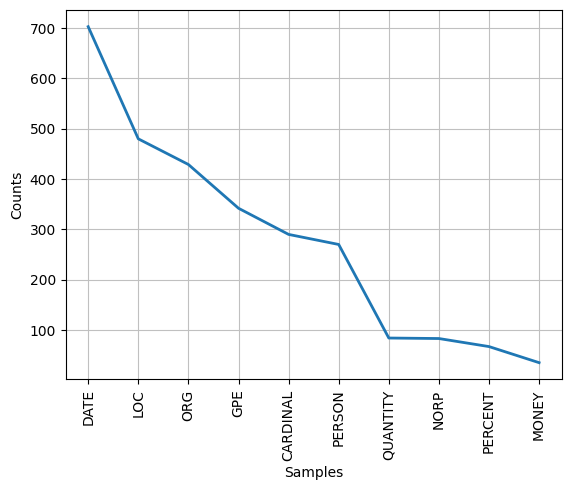

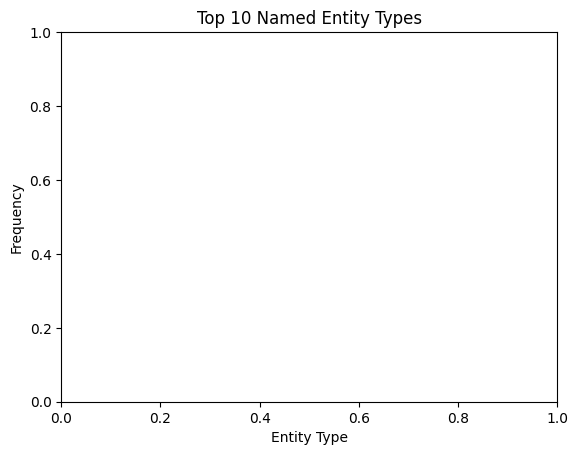

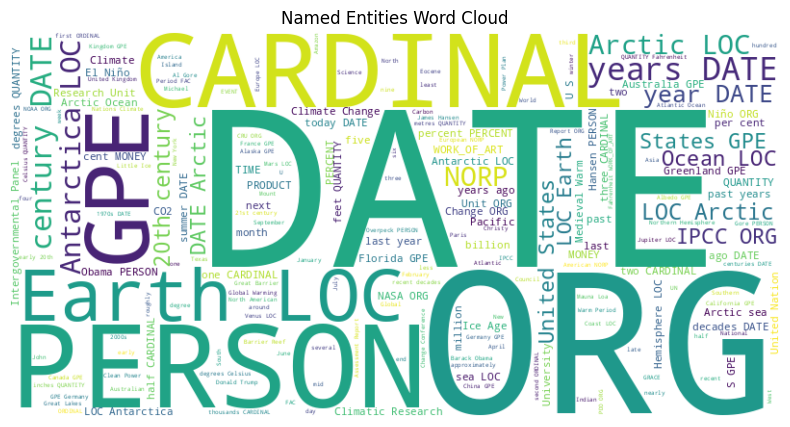

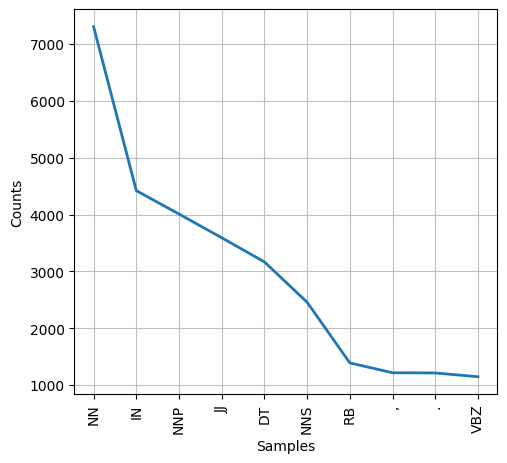

<ipython-input-24-df4932b2af0f>:99: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


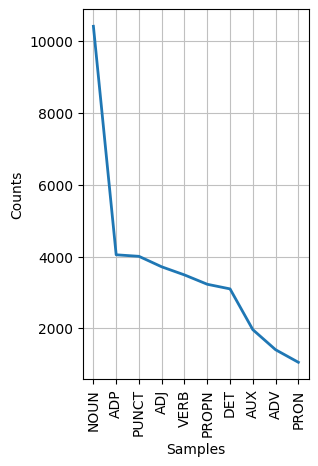

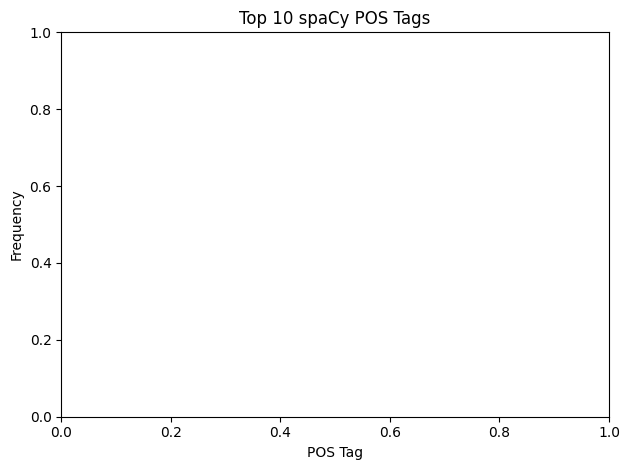

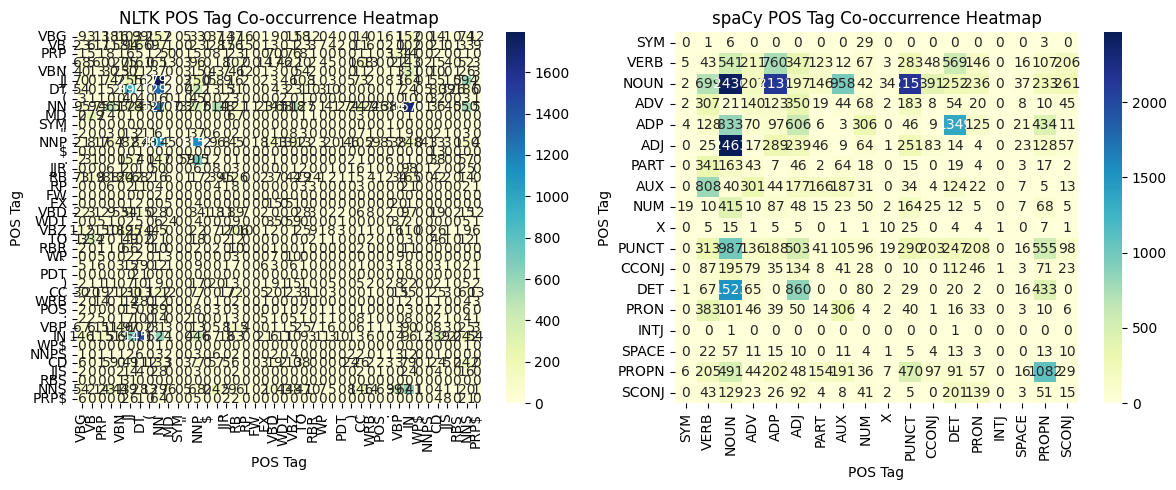

In [24]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from wordcloud import WordCloud

# Download spaCy model for NER
!python -m spacy download en_core_web_sm

# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Load your dataset (upload the "climate-fever.csv" file to your Colab environment)
df = pd.read_csv("climate-fever.csv")

# Define a function to extract text from relevant columns
def extract_text(row):
    return row['claim'] + ' ' + row['evidences/0/article']

# Create a new column 'combined_text' with the extracted text
df['combined_text'] = df.apply(extract_text, axis=1)

# Preprocess the combined text (remove HTML tags, special characters, lowercase, etc.)
def preprocess_text(text):
    # Add your preprocessing steps here
    return text

df['preprocessed_text'] = df['combined_text'].apply(preprocess_text)

# Define a function for NER
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

df['ner_results'] = df['preprocessed_text'].apply(perform_ner)

# Download the 'averaged_perceptron_tagger' model for NLTK
nltk.download('averaged_perceptron_tagger')

# Define a function for POS tagging using NLTK
def perform_pos_tagging(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

df['pos_tags_nltk'] = df['preprocessed_text'].apply(perform_pos_tagging)

# Define a function for POS tagging using spaCy
def perform_pos_tagging_spacy(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

df['pos_tags_spacy'] = df['preprocessed_text'].apply(perform_pos_tagging_spacy)

# Analyze NER results
entity_types = [entity[1] for entities in df['ner_results'] for entity in entities]
entity_type_freq = nltk.FreqDist(entity_types)

# Plot a bar chart for NER entity types
entity_type_freq.plot(10, cumulative=False)
plt.title("Top 10 Named Entity Types")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.show()

# Extract named entities as a single text string
named_entities_text = ' '.join([' '.join(entity) for entities in df['ner_results'] for entity in entities])

# Create a word cloud for named entities
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(named_entities_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Named Entities Word Cloud")
plt.axis("off")
plt.show()

# Extract POS tags
pos_tags_nltk = [pos[1] for pos_tags in df['pos_tags_nltk'] for pos in pos_tags]
pos_tags_spacy = [pos[1] for pos_tags in df['pos_tags_spacy'] for pos in pos_tags]

# Create a frequency distribution of POS tags for NLTK and spaCy
pos_tag_freq_nltk = nltk.FreqDist(pos_tags_nltk)
pos_tag_freq_spacy = nltk.FreqDist(pos_tags_spacy)

# Plot bar charts for NLTK and spaCy POS tags
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
pos_tag_freq_nltk.plot(10, cumulative=False)
plt.title("Top 10 NLTK POS Tags")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
pos_tag_freq_spacy.plot(10, cumulative=False)
plt.title("Top 10 spaCy POS Tags")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Create a list of POS tag pairs
pos_tag_pairs_nltk = list(zip(pos_tags_nltk, pos_tags_nltk[1:]))
pos_tag_pairs_spacy = list(zip(pos_tags_spacy, pos_tags_spacy[1:]))

# Calculate the frequency of POS tag pairs for NLTK and spaCy
pos_tag_pairs_freq_nltk = Counter(pos_tag_pairs_nltk)
pos_tag_pairs_freq_spacy = Counter(pos_tag_pairs_spacy)

# Create a set of unique POS tags for NLTK and spaCy
unique_pos_tags_nltk = list(set(pos_tags_nltk))
unique_pos_tags_spacy = list(set(pos_tags_spacy))

# Create matrices of POS tag co-occurrences using NumPy arrays for NLTK and spaCy
pos_tag_matrix_nltk = np.zeros((len(unique_pos_tags_nltk), len(unique_pos_tags_nltk)), dtype=int)
pos_tag_matrix_spacy = np.zeros((len(unique_pos_tags_spacy), len(unique_pos_tags_spacy)), dtype=int)

# Create mappings of POS tags to matrix indices for NLTK and spaCy
tag_to_index_nltk = {tag: index for index, tag in enumerate(unique_pos_tags_nltk)}
tag_to_index_spacy = {tag: index for index, tag in enumerate(unique_pos_tags_spacy)}

# Fill the matrices with co-occurrence counts for NLTK and spaCy
for tag1, tag2 in pos_tag_pairs_nltk:
    pos_tag_matrix_nltk[tag_to_index_nltk[tag1]][tag_to_index_nltk[tag2]] += 1

for tag1, tag2 in pos_tag_pairs_spacy:
    pos_tag_matrix_spacy[tag_to_index_spacy[tag1]][tag_to_index_spacy[tag2]] += 1

# Create heatmaps for NLTK and spaCy POS tag co-occurrences
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pos_tag_matrix_nltk, cmap='YlGnBu', annot=True, fmt='d', xticklabels=unique_pos_tags_nltk, yticklabels=unique_pos_tags_nltk)
plt.title("NLTK POS Tag Co-occurrence Heatmap")
plt.xlabel("POS Tag")
plt.ylabel("POS Tag")

plt.subplot(1, 2, 2)
sns.heatmap(pos_tag_matrix_spacy, cmap='YlGnBu', annot=True, fmt='d', xticklabels=unique_pos_tags_spacy, yticklabels=unique_pos_tags_spacy)
plt.title("spaCy POS Tag Co-occurrence Heatmap")
plt.xlabel("POS Tag")
plt.ylabel("POS Tag")

plt.tight_layout()
plt.show()


In [26]:
pip install nbconvert